# Calculate Rolling Mean of Precipitation 
##### By Emily Pease, UT Austin
##### 11/18/2019

The rolling mean of precipitation (P$_{RM}$) was calculated with a trailing window of $t=3$ days.  Precipitation has a value of 0.0 $in.$ in approximately $\frac{2}{3}$ of observations, which is expected in the region, and rolling mean of precipitation helped to distribute the data more evenly.  It can take up to a few days after a large storm event for river discharge to again reach baseflow conditions.  This window size of 3 days was adequate in capturing a majority of storm flow.

In [5]:
import os                                                   
import numpy as np                                        
import pandas as pd                                      
import matplotlib.pyplot as plt                                             
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [6]:
df = pd.read_csv(os.path.join("..", "data", "ComalMasterDataset.csv"))
datetime = df['datetime']
del df["RvSpgCompare"]
del df["TOBS"]

df = df[df["datetime"] > '1949-12-29'] # remove data prior to the 1950s drought of record
df.reset_index(drop=True, inplace=True)
df.head()

,datetime,J17Level,J27Level,RvQ,PRCP,TMAX,TMIN,DeltaT,SpgQ
0,1949-12-30,663.81,871.05,282.0,0.108,57.0,47.0,10.0,282.0
1,1949-12-31,663.86,871.15,282.0,0.262,61.0,53.0,8.0,282.0
2,1950-01-01,664.21,871.15,286.0,0.030,67.0,55.0,12.0,286.0
3,1950-01-02,664.30,871.25,290.0,0.076,71.0,53.0,18.0,290.0
4,1950-01-03,663.99,871.25,286.0,0.000,71.0,57.0,14.0,286.0


##### The rolling mean plotted with the original data smooths out the signal

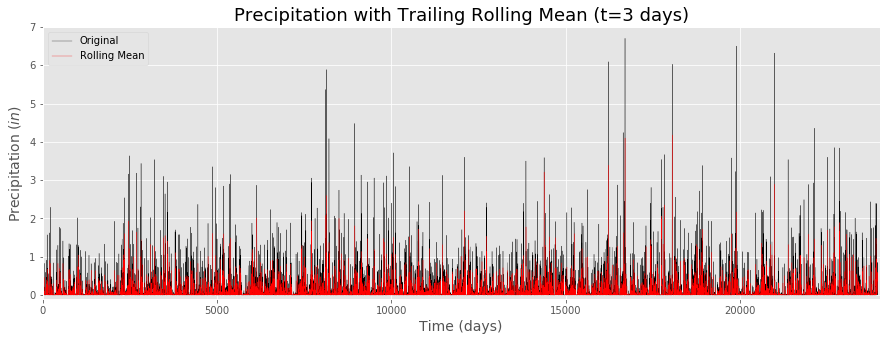

In [3]:
window_size = 3  #days        

#Determing rolling statistics
rolling_mean = df["PRCP"].rolling(window=window_size, center=False).mean()
rolling_std =  df["PRCP"].rolling(window=window_size, center=False).std()
rolling_P025 = df["PRCP"].rolling(window=window_size, center=False).quantile(.025)
rolling_P975 = df["PRCP"].rolling(window=window_size, center=False).quantile(.975)
df['rolling_mean'] = rolling_mean

#Plot rolling statistics:
fig, ax = plt.subplots(figsize=(15,5))
orig = plt.plot(df['PRCP'],   color='black', linewidth=0.3, label='Original')
mean = plt.plot(rolling_mean, color='red',   linewidth=0.3, label='Rolling Mean')
plt.title('Precipitation with Trailing Rolling Mean (t=3 days)', size=18); plt.legend(loc='best')
plt.ylabel("Precipitation ($in$)", size=14); plt.xlabel("Time (days)", size=14)
plt.xlim(0, 24000)
plt.ylim(-0.1, 7)
plt.savefig(os.path.join("..", "figs", "PrecipRollingMean.png"), bbox_inches='tight')

In [4]:
df["RvSpgDiff"] = np.nan
df["RvSpgDiff"].loc[df["rolling_mean"] == 0] = df["RvQ"] - df["SpgQ"]
df["RvSpgDiff"].fillna(0, inplace=True)
df.dropna(how='any', inplace=True)
df.to_csv(os.path.join("ComalPrecipRolling.csv"), index=False)
df

,datetime,J17Level,J27Level,RvQ,PRCP,TMAX,TMIN,DeltaT,SpgQ,rolling_mean,RvSpgDiff
2,1950-01-01,664.21,871.15,286.0,0.030000,67.0,55.0,12.0,286.0,0.133333,0.0
3,1950-01-02,664.30,871.25,290.0,0.076000,71.0,53.0,18.0,290.0,0.122667,0.0
4,1950-01-03,663.99,871.25,286.0,0.000000,71.0,57.0,14.0,286.0,0.035333,0.0
5,1950-01-04,663.50,871.25,282.0,0.014000,67.0,27.0,40.0,282.0,0.030000,0.0
6,1950-01-05,663.47,871.25,282.0,0.064000,30.0,27.0,3.0,282.0,0.026000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
23930,2018-10-14,677.90,871.90,331.0,0.006667,86.0,72.0,14.0,331.0,0.036667,0.0
23931,2018-10-15,677.80,872.00,389.0,0.806667,88.0,43.0,45.0,334.0,0.305556,0.0
23932,2018-10-16,678.60,872.10,418.0,0.846667,49.0,41.0,8.0,337.0,0.553333,0.0
23933,2018-10-17,679.00,872.30,354.0,0.130000,48.0,43.0,5.0,340.0,0.594444,0.0
